# DATATHON ENTEL 2022 - Reto1
## MODELO PREDICTIVO DE RENOVACIÓN DE EQUIPOS MÓVILES

### Descripción del reto
El reto consiste en desarrollar un modelo de propensión que calcule la probabilidad de que un cliente de Entel Empresas renueve su equipo móvil en los próximos 2 meses, usando solo los datos brindados en esta plataforma.

### Target
El target está definido como aquel usuario (número telefónico) cuyo equipo asociado fue renovado en los siguientes 2 meses.

### Plazos
Se aceptarán resultados hasta el domingo 14 de agosto del 2022 a las 11:59 PM (UTC-5). El equipo puede hacer hasta un máximo de 5 sumisiones diarias por equipo.

### Requisitos y premios
Los equipos que ocupen los primeros 5 lugares del leaderboard de Kaggle serán los finalistas y avanzarán a la siguiente etapa: EVENTO CENTRAL, previa validación del comité organizador de Entel del cumplimiento de las reglas de la competencia, y pudiendo solicitar la colaboración del equipo participante para la revisión.

Los finalistas deberán entregar al comité organizador de Entel los scripts y documentación del análisis que componen su solución. Además, deberán incluir una presentación sobre su propuesta.

### Evaluación
Se evaluará a los participantes en función del área bajo la curva ROC, de mayor a menor. Durante la competencia se reportarán resultados sobre un subconjunto del set de evaluación (30%), pero los resultados finales se calcularán sobre los datos restantes (70%)

### Submission Format
Para todos los participantes, los archivos subidos deberán tener las siguientes columnas: nro_telefono_hash yClass. Tener en cuanta que el valor de "TARGET" hace referencia a la probabilidad de renovar un equipo móvil.

El formato del archivo será el siguiente:

> nro_telefono_hash,TARGET
>0,0.8
>1,0.3
>2,0.9

### Train & Test
Para la data train se usarán los periodos de Enero (202201), Febrero (202202) y Marzo (202203) de todas las fuentes. La clase de renovación en los próximos 2 meses se encuentra en la Fuente Target (08_target_202201_202203.csv)
Para la data test se usará el periodo Abril (202204) de todas las fuentes.

### Fuente
#### Suscriptora

| feature               | description                                             |
|-----------------------|---------------------------------------------------------|
| NUMPERIODO            |  Periodo de cierre del mes indicado.                    |
| FECINGRESOCLIENTE     |  Fecha de activación de la cuenta.                      |
| nro_documento_hash    |  Código de identificación del cliente.                  |
| nro_telefono_hash     |  Código de identificación de la línea móvil.            |
| FECACTIVACIONCONTRATO |  Fecha de activación inicial (venta) de la línea móvil. |
| TIPO_ADQ              |  Tipo de adquisión del cliente.                         |

#### Adenda (penalidades)

| feature           | description                                                      |
|-------------------|------------------------------------------------------------------|
| NUMPERIODO        |  Periodo de cierre de mes.                                       |
| nro_telefono_hash |  Código identificador de la línea.                               |
| VCHMESADENDA      |  Meses transcurridos desde el inicio de la adenda.               |
| VCHPENALIDAD      |  Monto de penalidad vigente a la fecha en caso de desactivación. |

#### Perfil digital

| feature           | description                                                                |
|-------------------|----------------------------------------------------------------------------|
| nro_telefono_hash |  Código de identificación de la línea.                                     |
| GRUPO             |  Categoria de aplicaciones usadas por la línea.                            |
| SCORECAT          |  Clasificación de que tan digital es el cliente categorizados por niveles. |
| PERIODO           |  Periodo de cierre de mes.                                                 |

#### Roaming

| feature           | description                                                      |
|-------------------|------------------------------------------------------------------|
| PERIODO           |  Periodo de cierre del mes indicado.                             |
| nro_telefono_hash |  Telefono del cliente.                                           |
| MINUTOS           |  Minutos tráficados entrates y salientes realizado por la línea. |
| GIGAS             |  Gb consumidos entrantes y salientes realizado por la línea.     |
| MENSAJES          |  Cantidad de mensajes enviados y recibidos de la línea.          |
| TIPOSERVICIO      |  Tipo de consumo roaming realizado por la línea.                 |

#### terminales

| feature           | description                                     |
|-------------------|-------------------------------------------------|
| PERIODO           |  Periodo de cierre de mes.                      |
| nro_telefono_hash |  Código identificador de la línea.              |
| MARCA             |  Marca del equipo.                              |
| MODELO            |  Modelo del equipo.                             |
| NUEVA_GAMMA       |  Clasificación de la gama en base al modelo.    |
| LANZAMIENTO       |  Fecha de lanzamiento del equipo.               |
| OS                |  Sistema operativo del equipo.                  |
| DEVICE_TYPE       |  Tipo de dispositivo (smartphone, tablet, etc). |

#### Convergente

| feature            | description                                |
|--------------------|--------------------------------------------|
| PERIODO            |  Periodo de cierre del mes indicado.       |
| nro_documento_hash |  Codigo del cliente.                       |
| GIRO               |  Giro de negocio.                          |
| SUBGIRO            |  Subgiro de negocio.                       |
| TIENE_PROD_1       |  Indica si tiene servicios del producto 1. |
| TIENE_PROD_2       |  Indica si tiene servicios del producto 2. |
| TIENE_PROD_3       |  Indica si tiene servicios del producto 3. |

#### Target

| feature           | description                                                                |
|-------------------|----------------------------------------------------------------------------|
| PERIODO           |  Periodo de cierre del mes indicado.                                       |
| nro_telefono_hash |  Código identificador de la línea.                                         |
| TARGET            |  Indica si el cliente renovó en los próximos 2 meses (1) o no lo hizo (0). |

In [2]:
import pandas as pd
import numpy as np

pd.read_csv('../01Data/01csv/01_suscriptora_202201_202204.csv').to_parquet('../01Data/02parquet/01_suscriptora_202201_202204.parquet')
pd.read_csv('../01Data/01csv/02_adenda_202201_202204.csv').to_parquet('../01Data/02parquet/02_adenda_202201_202204.parquet')
pd.read_csv('../01Data/01csv/03_perfil_digital_202201_202204.csv').to_parquet('../01Data/02parquet/03_perfil_digital_202201_202204.parquet')
pd.read_csv('../01Data/01csv/04_roaming_202201_202204.csv').to_parquet('../01Data/02parquet/04_roaming_202201_202204.parquet')
pd.read_csv('../01Data/01csv/05_terminales_202201_202204.csv').to_parquet('../01Data/02parquet/05_terminales_202201_202204.parquet')
pd.read_csv('../01Data/01csv/06_trafico_202201_202204.csv').to_parquet('../01Data/02parquet/06_trafico_202201_202204.parquet')
pd.read_csv('../01Data/01csv/07_convergente_202201_202204.csv').to_parquet('../01Data/02parquet/07_convergente_202201_202204.parquet')
pd.read_csv('../01Data/01csv/08_target_202201_202203.csv').to_parquet('../01Data/02parquet/08_target_202201_202203.parquet')

In [4]:
def lower_columns(df):
    df.columns = [col.lower() for col in df.columns]
    return df

def calculate_antiguedad(df, fecha, periodo):
    return (pd.to_datetime(df[periodo],format='%Y%m') - pd.to_datetime(df[fecha].dt.year*100 + df[fecha].dt.month,format='%Y%m')).astype('<m8[M]') 

def calculate_antiguedad_fechas(df, fecha_1, fecha_2):
    return (pd.to_datetime(df[fecha_2].dt.year*100 + df[fecha_2].dt.month,format='%Y%m') - pd.to_datetime(df[fecha_1].dt.year*100 + df[fecha_1].dt.month,format='%Y%m')).astype('<m8[M]')

def calculate_antiguedad_fechas_dias(df, fecha_1, fecha_2):
    return (df[fecha_2] - df[fecha_1]).astype('<m8[D]')


def add_months_periodo(periodo, meses):
    return int((pd.to_datetime(str(periodo),format='%Y%m') + pd.offsets.DateOffset(months=meses)).strftime('%Y%m'))

def depurar_date(df):
    #imputamos las fechas de "0001-01-01 00:00:00" por '2000-01-01 00:00:00', en total son 1337
    df['fecingresocliente'] = np.where(df['fecingresocliente']=="0001-01-01 00:00:00",'2000-01-01 00:00:00',df['fecingresocliente'])
    #convertir fechas ingreso de clientes a datetime
    df['fecingresocliente'] = pd.to_datetime(df['fecingresocliente'], format='%Y-%m-%d %H:%M:%S')
    #se eliminan las filas con contratos sin fecactivacioncontrato, en total son 4 registros que equivale a un cliente
    df = df.query('fecactivacioncontrato !="0001-01-01 00:00:00"')
    #convertir fechas activación contrato a datetime
    df['fecactivacioncontrato'] = pd.to_datetime(df['fecactivacioncontrato'], format='%Y-%m-%d %H:%M:%S')
    #corregir el año de la fecha de ingreso de clientes
    df['fecingresocliente'] = np.where(df['fecingresocliente'].dt.year.isin([2099,2098]),(df['fecingresocliente'] - pd.offsets.DateOffset(years=90)),df['fecingresocliente'])
    return df

In [5]:
def process_susciptoras(periodo):
    df_sus = pd.read_parquet('../01Data/02parquet/01_suscriptora_202201_202204.parquet').query('NUMPERIODO == @periodo')
    #convertimos el nombre de las columnas en minusculas
    df_sus = lower_columns(df_sus)
    #Creación del df de envío
    df_envio =  df_sus.query('fecactivacioncontrato == "0001-01-01 00:00:00"')[['nro_telefono_hash']].copy()
    df_envio['TARGET'] = 0
    #Deurar fechas y crear antiguedad
    df_sus = depurar_date(df_sus)
    df_sus['antiguedad_cliente'] = calculate_antiguedad(df_sus,'fecingresocliente','numperiodo')
    df_sus['antiguedad_contrato'] = calculate_antiguedad(df_sus,'fecactivacioncontrato','numperiodo')
    df_sus['antiguedad_cliente_contrato'] = calculate_antiguedad_fechas(df_sus,'fecingresocliente','fecactivacioncontrato')
    #save dataframe to parquet
    df_sus.to_parquet('../04DB/01suscriptora/suscriptora_'+str(periodo)+'.parquet')
    df_envio.to_parquet('../04DB/08target/envio_'+str(periodo)+'.parquet')
    return df_sus, df_envio

In [4]:
for meses in range(0,4):
    print(add_months_periodo(202201,meses))
    df_sus, df_envio = process_susciptoras(periodo=add_months_periodo(202201,meses))

202201


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

202202
202203
202204


## 02 Adenda

In [46]:
df_ade = pd.read_parquet('../01Data/02parquet/02_adenda_202201_202204.parquet')
df_ade = lower_columns(df_ade)
df_ade.groupby(['nro_telefono_hash','numperiodo'],as_index=False).size().head(10)
df_ade['con_adenda'] = 1
df_ade.to_parquet('../04DB/02adenda/adenda.parquet')

## 03 Perfil digital

In [6]:
df_dig = pd.read_parquet('../01Data/02parquet/03_perfil_digital_202201_202204.parquet')
df_dig = lower_columns(df_dig)
df_dig.rename(columns={'periodo':'numperiodo'},inplace=True)


In [8]:
def myFunc(e):
    return int(e[6:10])
def sort_list(list):
    return sorted(list, key=myFunc)
def find_element(list):
    element = 'grupo_10'
    return list.index(element) if element in list else -1

df_dig['cant_grupos'] = df_dig['grupo'].str.split('|').apply(sort_list).apply(len)

clases = df_dig['grupo'].str.split('|').apply(sort_list)

result = []
[result.extend(el) for el in clases]
objetos = list(set(result))
objetos.sort(key=myFunc)
for col in objetos:
    def find_element(list):
        element = col
        return list.index(element) if element in list else -1
    df_dig[col]=df_dig['grupo'].str.split('|').apply(sort_list).apply(find_element)
    print(col)

grupo_1
grupo_2
grupo_3
grupo_4
grupo_5
grupo_6
grupo_7
grupo_8
grupo_9
grupo_10
grupo_11


In [9]:
df_dig

,nro_telefono_hash,grupo,scorecat,numperiodo,grupo_1,grupo_2,grupo_3,grupo_4,grupo_5,grupo_6,grupo_7,grupo_8,grupo_9,grupo_10,grupo_11
0,00c4e2339165b15e3f02da620f77bc92196b79435fabdf...,grupo_1|grupo_10|grupo_7|grupo_8|grupo_4|grupo_9,medio,202201,0,-1,-1,1,-1,-1,2,3,4,5,-1
1,00c5815b69bbf2beea264dbfec428dceb5c96026376aa0...,grupo_1|grupo_6|grupo_10|grupo_8,medio,202201,0,-1,-1,-1,-1,1,-1,2,-1,3,-1
2,00c6442fb6364f090fc6d67e7fea70f5b39ed440fd7e2e...,grupo_1|grupo_6|grupo_10|grupo_8|grupo_9|grupo_11,muy alto,202201,0,-1,-1,-1,-1,1,-1,2,3,4,5
3,00c65e02c415ffa0e868b780d104f8d1ed3e754bf0a634...,grupo_1|grupo_10|grupo_8|grupo_9,medio,202201,0,-1,-1,-1,-1,-1,-1,1,2,3,-1
4,00c6711e91d80998b1cacfc42499a875ed2b0fc42bfa88...,grupo_8,bajo,202201,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617939,e29ba3bb9f658dcaa871f136989489307f09f0c391e2b1...,grupo_1|grupo_7|grupo_8|grupo_4|grupo_11,medio,202204,0,-1,-1,1,-1,-1,2,3,-1,-1,4
617940,e29c2e089323f289310eca1b2fc308bbb7d94b9467cb67...,grupo_8,muy alto,202204,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
617941,e29ca58f356244d21ff0d9ebd02b6c5f260b02451174c4...,grupo_1|grupo_7|grupo_8|grupo_11,medio,202204,0,-1,-1,-1,-1,-1,1,2,-1,-1,3
617942,e29db9d8e1c424abee9167008c5649bbe3ccf1789f3233...,grupo_1|grupo_7|grupo_8|grupo_4|grupo_9,medio,202204,0,-1,-1,1,-1,-1,2,3,4,-1,-1


In [70]:
df_dig.to_parquet('../04DB/03digital/digital.parquet')

## 04 Roaming
Fuente distractora, se encontró un potencial de aquellos clientes que sólo usan el tipo 3 en roaming, sin embargo el volumen no es significativo. (51 casos)

In [10]:
df_roa = pd.read_parquet('../01Data/02parquet/04_roaming_202201_202204.parquet')
df_roa = lower_columns(df_roa)
df_roa.rename(columns={'periodo':'numperiodo'},inplace=True)
df_roa['fechatrafico'] = pd.to_datetime(df_roa['fechatrafico'], format='%d/%m/%Y')
df_roa.groupby(['numperiodo','fechatrafico'],as_index=False).agg({'fechatrafico':['min','max'],'tiposervicio':'count'})#.sort_values('tiposervicio',ascending=False).head(10)
df_tiposervicio = df_roa[['nro_telefono_hash','numperiodo','tiposervicio']].drop_duplicates().sort_values('tiposervicio')\
                                                        .groupby(['nro_telefono_hash','numperiodo'],as_index=False)['tiposervicio'].apply(''.join)#.groupby('tiposervicio',as_index=False).size()

In [32]:
print(df_roa.columns)
df_roa.groupby(['tiposervicio'],as_index=False).agg({'minutos':'sum','gigas':'sum','mensajes':'sum'})

Index(['numperiodo', 'nro_telefono_hash', 'minutos', 'gigas', 'mensajes',
       'tiposervicio', 'fechatrafico'],
      dtype='object')


,tiposervicio,minutos,gigas,mensajes
0,TIPO1,0.000000,9856.781928,0.0
1,TIPO2,43496.816667,0.000000,0.0
2,TIPO3,0.000000,0.000000,1741.0


<AxesSubplot:>

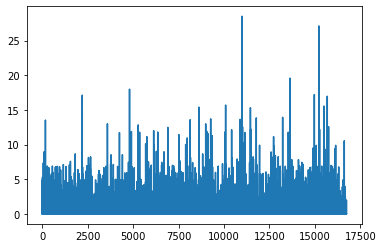

In [29]:
df_gigas_x_tipo = df_roa.groupby(['nro_telefono_hash','numperiodo','tiposervicio'],as_index=False).agg({'gigas':'sum'}).pivot(index=['nro_telefono_hash','numperiodo'],columns='tiposervicio',values='gigas').fillna(0).reset_index()
#df_gigas_x_tipo.drop(columns = ['tiposervicio'],inplace=True)
df_gigas_x_tipo.columns = ['nro_telefono_hash','numperiodo','gigas_tipo1','gigas_tipo2','gigas_tipo3']
df_gigas_x_tipo.gigas_tipo1.plot()

In [71]:
df_roa_telefono = df_roa.groupby(['numperiodo','nro_telefono_hash'],as_index=False).agg({'fechatrafico':['min','max'],
                                                                                         'tiposervicio':'count',
                                                                                         'minutos':['sum','mean','std'],
                                                                                         'mensajes':['sum','mean','std'],
                                                                                         'gigas':['sum','mean','std']})
df_roa_telefono.columns =  [''.join(col) for col in df_roa_telefono.columns]
df_roa_telefono['max_tiempo_interaccion'] = calculate_antiguedad_fechas_dias(df_roa_telefono,'fechatraficomin','fechatraficomax')
df_roa_telefono = pd.merge(df_roa_telefono,df_tiposervicio,on=['numperiodo','nro_telefono_hash'],how ='inner')
df_roa_telefono.to_parquet('../04DB/04roaming/roaming.parquet')

## 05 Terminales

In [34]:
df_termi = pd.read_parquet('../01Data/02parquet/05_terminales_202201_202204.parquet')
df_termi = lower_columns(df_termi)
df_termi.rename(columns={'periodo':'numperiodo'},inplace=True)
df_termi.groupby(['nro_telefono_hash','numperiodo'],as_index=False).size().sort_values('size',ascending=False).head(10)
df_termi['lanzamiento'] = pd.to_datetime(df_termi['lanzamiento'], format='%Y-%m-%d')
df_termi['antiguedad_lanzamiento'] = calculate_antiguedad(df_termi,'lanzamiento','numperiodo')
#df_dig.groupby(['grupo'],as_index=False).size().sort_values('grupo',ascending=False)
#df_dig['con_perfil_digital'] = 1
#df_dig['grupo'].str.split('|')
df_termi.to_parquet('../04DB/05terminal/terminal.parquet')

In [35]:
df_termi

,numperiodo,nro_telefono_hash,marca,modelo,nueva_gamma,lanzamiento,os,device_type,antiguedad_lanzamiento
0,202201,3038cb30ca012f56def932df8288eea082ab3ae86571b4...,55562347f437d65829303cf6307e71acf8b84a020989dd...,3f302014219b995e2ea726ffcd4de7253f77954cc71a11...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,2019-08-27,1bde98c0df50d2e6aa7f88be84a65da1c7d6a285626385...,SMARTPHONE,29.0
1,202201,60ebda703fd786068451fc68c4f896e1dbefba0c431a5d...,2fa558397b58d443dddd1352c5046009968f6b7ad59fca...,120785b6f1a729a705e45fa53be27ca53b88619ef137cf...,f793de205ead5ac302c4a1627829dea41f176b1068b993...,2018-02-01,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,46.0
2,202201,3eeb9a7ec802185cea50cfcac1fd0d8edafc0a1598721c...,d4c6a5785b57062229039a79c714d3cb3a4dac4e3e63ef...,d7f86146eff275ec69aa3de3aaa7d951bcb0667c186ed3...,8563abec343968034b0624650aed7254081e9e39e6b32e...,2019-03-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,34.0
3,202201,6e0be6c2dfead876db8d48c3d19b16e5be113cf9060eb6...,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,c2f4db3d203ec9b620e12ca3e8dd689db22c109d349ba1...,de88c121a82a06352bf1aaceba20578356408a334ba046...,2017-06-20,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,55.0
4,202201,f51170e691c700083a162ebea68712351bce1da6163e26...,2fa558397b58d443dddd1352c5046009968f6b7ad59fca...,582969a27a84f2b65970db6cb1907706e6518405ced187...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,2019-08-06,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,29.0
...,...,...,...,...,...,...,...,...,...
658181,202204,2d3c8389b40a88ac7479875f992997e9895a447154612c...,f01640a07b4c0521a49c0ec0a8915832798f19533aecda...,c8f81211f4fd423797d2a61e3ae1ca32853fc979cc3552...,f793de205ead5ac302c4a1627829dea41f176b1068b993...,2020-12-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,15.0
658182,202204,35db84f40721bf99b0b92b16c4e280cc3ba6c6b2256244...,f01640a07b4c0521a49c0ec0a8915832798f19533aecda...,c8f81211f4fd423797d2a61e3ae1ca32853fc979cc3552...,f793de205ead5ac302c4a1627829dea41f176b1068b993...,2020-12-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,15.0
658183,202204,4c0e54aa8c451d7095a300dd2a44ffebd15604294772a0...,f01640a07b4c0521a49c0ec0a8915832798f19533aecda...,c8f81211f4fd423797d2a61e3ae1ca32853fc979cc3552...,f793de205ead5ac302c4a1627829dea41f176b1068b993...,2020-12-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,15.0
658184,202204,3061877a9e46ac1c8b2ca9069cf7bcb1aadce39e7c787a...,f01640a07b4c0521a49c0ec0a8915832798f19533aecda...,c8f81211f4fd423797d2a61e3ae1ca32853fc979cc3552...,f793de205ead5ac302c4a1627829dea41f176b1068b993...,2020-12-29,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,15.0


## 06 Tráfico

In [36]:
df_trafi = pd.read_parquet('../01Data/02parquet/06_trafico_202201_202204.parquet')
df_trafi = lower_columns(df_trafi)
df_trafi.groupby(['nro_telefono_hash','numperiodo'],as_index=False).size().sort_values('size',ascending=True).head(10)
df_trafi.to_parquet('../04DB/06trafico/trafico.parquet')

<AxesSubplot:>

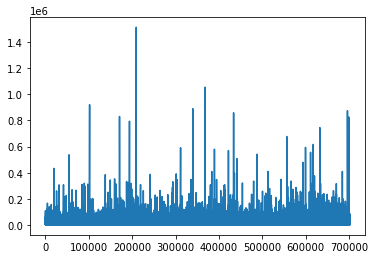

In [40]:
df_trafi.trafico_total.plot()

## 07 Convergente

In [41]:
df_conv = pd.read_parquet('../01Data/02parquet/07_convergente_202201_202204.parquet')
df_conv = lower_columns(df_conv)
df_conv.rename(columns={'periodo':'numperiodo'},inplace=True)
df_conv.groupby(['nro_documento_hash','numperiodo'],as_index=False).size().sort_values('size',ascending=False).head(10)
df_conv.to_parquet('../04DB/07convergente/convergente.parquet')

In [42]:
df_conv

,numperiodo,nro_documento_hash,giro,subgiro,tiene_prod_1,tiene_prod_2,tiene_prod_3
0,202201,8c83da948a54dd0b489b41b0516fc6ab7d0adc89e16b28...,6556b864eb301420e23fbe13f5c80b73f96f1435b5cd90...,1450d230323851b3f679d2a220fb384f5c3d580941103b...,1,0,0
1,202201,255d1370d4fd3e2ce5162802e98393a1408a4b0ddaeb70...,f1e43e5313b231d1fbe5890cbd9e50b9276e41866a0113...,876b87ec4b6570e78ffb9b4c2505f423dfae0921984a2d...,0,0,0
2,202202,fdbc6746b200c63cd97923cd5094400ca52c521eb603bf...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,0,1,0
3,202202,71ac51a23ec0304e773f7bc2bfe4b72124a0b1b8ec98a2...,6556b864eb301420e23fbe13f5c80b73f96f1435b5cd90...,b2ba82a2c8dd20e7a95ffd56dfd47df471b5c79089a90f...,1,0,0
4,202202,03ebe3027f1c16241216875351938854d97a321ab89b46...,a830ede4aca0e9472dac4a9ba2f46bdca11aedc81fb2bc...,7b5779e0c5e459a3881cbc701056e0ae1296feabbafb24...,0,0,0
...,...,...,...,...,...,...,...
280445,202204,d258aae9bb8b0bffb2cd5b2d76071f5bccb7642811ab35...,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,0,0,0
280446,202204,7e203669eaf54112ba41cc6a8be594ab5ddc3015d2f8ce...,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,1,0,0
280447,202204,1d1d3c3e334163242af1aa8c5d46b4f6b6e0141cb81ff1...,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,0,0,0
280448,202204,1f741945d3419fa7be3f1a9c576dc0dc41b23d7cd9ffc0...,5b8e595b8cebb006e39a3d289e465a5718996785008cbb...,bd1b475ded03bdb3ab78de2f74782ad855c3c4b085d167...,0,0,0


## 08 Target

In [132]:
df_target = pd.read_parquet('../01Data/02parquet/08_target_202201_202203.parquet')
df_target.columns =['numperiodo', 'nro_telefono_hash', 'target']
df_evol = df_target.pivot(index='nro_telefono_hash',columns='numperiodo',values='target').fillna(-1).reset_index()
df_evol.columns = ['nro_telefono_hash','target202201','target202202','target202203']
#df_evol['target'] = df_evol[['target202201','target202202','target202203']].max(axis=1).astype('str')
#df_evol.set_index('nro_telefono_hash',inplace=True)
df_evol.head()

,nro_telefono_hash,target202201,target202202,target202203
0,00028124dc0d59a40d0076531e2b0d225d1d50ef4c2a24...,0.0,0.0,-1.0
1,0002aa450f7dbb71c390c3d83d727d7c9eaadc01ccaf94...,-1.0,-1.0,0.0
2,0002c657c0116e2f641aea5bdb00c7f00121500b7001df...,0.0,0.0,0.0
3,0002de082e6a7f5729624a676e6ef2a2d4a4cfc1edca3d...,0.0,0.0,0.0
4,00032a34e41a31db43e20fc87b3959396335a9cbf2e34c...,0.0,0.0,0.0


In [116]:
df_evol.groupby(['target202201','target202202'],as_index=False).size()
#df_evol.groupby(['target202202','target202203'],as_index=False).size()
#df_evol.groupby(['target202201','target202202','target202203'],as_index=False).size()

,target202201,target202202,size
0,-1.0,-1.0,16169
1,-1.0,0.0,7842
2,-1.0,1.0,205
3,0.0,-1.0,5368
4,0.0,0.0,168913
5,0.0,1.0,2353
6,1.0,-1.0,4
7,1.0,0.0,2719
8,1.0,1.0,2789


In [110]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["202201 -1", "202201 0", "202201 +1", "202202 -1", "202202 0", "202202 +1", "202203 -1", "202203 0", "202203 +1"],
      color = ["#AB63FA", "#EF553B", "#00CC96", "#AB63FA", "#EF553B", "#00CC96", "#AB63FA", "#EF553B", "#00CC96"]
    ),
    link = dict(
      source = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [3, 4, 5, 3, 4, 5, 3, 4, 5, 6, 7, 8, 6, 7, 8, 7, 8],
      value = [16169, 7842, 205, 5368, 168913,2353,4,2719,2789,5253, 15876, 412, 20080, 156694, 2700, 2846, 2501],
      color = [ "#AB63FA","#AB63FA","#AB63FA", 
                "#EF553B","#EF553B","#EF553B",
                "#00CC96","#00CC96","#00CC96",
                "#AB63FA","#AB63FA","#AB63FA",
                "#EF553B","#EF553B","#EF553B",
                "#00CC96","#00CC96","#00CC96",]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [135]:
df_target_202202 = df_evol.query('target202202 >= 0 & target202201 == 1').copy()
df_target_202202['periodo'] = 202202
df_target_202202.rename(columns={'target202202':'target_new'},inplace=True)
df_target_202202.drop(columns=['target202201','target202203'],inplace=True)
df_target_202203 = df_evol.query('target202203 >= 0 & target202202 == 1').copy()
df_target_202203['periodo'] = 202203
df_target_202203.rename(columns={'target202203':'target_new'},inplace=True)
df_target_202203.drop(columns= ['target202201','target202202'],inplace=True)
df_nuevo_target = pd.concat([df_target_202202,df_target_202203],axis=0)
df_nuevo_target.to_parquet('../04DB/08target/target.parquet')
df_nuevo_target.head()

,nro_telefono_hash,target_new,periodo
33,000cd035db33eaba6e21cd19772fb466157bcd9d70d80c...,1.0,202202
54,0010df578415dbdac37bc6986d972e323e609670175813...,0.0,202202
380,008410cbb72173d50e6370c8a99bdc303c8f0e517408ac...,0.0,202202
400,008a3f092a3a544680d8b274f1fb1ef03e83a5bdb0d89d...,1.0,202202
425,00908fad41b963410ce62f7f463b941fdbe95bce5436d6...,0.0,202202


## Read parquet and run analytics

In [137]:
import pandas as pd
import glob
import os

path = r'../04DB/01suscriptora/' # use your path
li = [path + 'suscriptora_202201.parquet',path + 'suscriptora_202202.parquet',path + 'suscriptora_202203.parquet',path + 'suscriptora_202204.parquet']

df_suscri = pd.concat(map(pd.read_parquet, li))
df_adenda = pd.read_parquet('../04DB/02adenda/adenda.parquet')
df_digita = pd.read_parquet('../04DB/03digital/digital.parquet')
df_roamin = pd.read_parquet('../04DB/04roaming/roaming.parquet')
df_termin = pd.read_parquet('../04DB/05terminal/terminal.parquet')
df_trafic = pd.read_parquet('../04DB/06trafico/trafico.parquet')
df_conver = pd.read_parquet('../04DB/07convergente/convergente.parquet')
df_target_new = pd.read_parquet('../04DB/08target/target.parquet')
df_target = pd.read_parquet('../01Data/02parquet/08_target_202201_202203.parquet')
df_target.columns =['numperiodo', 'nro_telefono_hash', 'target']

In [138]:
df_model = pd.merge(left=df_suscri,right= df_adenda,on=['numperiodo','nro_telefono_hash'],how='left')
df_model = pd.merge(left=df_model,right= df_digita,on=['numperiodo','nro_telefono_hash'],how='left')
df_model = pd.merge(left=df_model,right= df_roamin,on=['numperiodo','nro_telefono_hash'],how='left')
df_model = pd.merge(left=df_model,right= df_termin,on=['numperiodo','nro_telefono_hash'],how='left')
df_model = pd.merge(left=df_model,right= df_trafic,on=['numperiodo','nro_telefono_hash'],how='left')
df_model = pd.merge(left=df_model,right= df_conver,on=['numperiodo','nro_documento_hash'],how='left')
df_model = pd.merge(left=df_model,right= df_target,on=['numperiodo','nro_telefono_hash'],how='left')
df_model.rename(columns={'numperiodo':'periodo'},inplace=True)
df_model = pd.merge(left=df_model,right= df_target_new,on=['periodo','nro_telefono_hash'],how='left')

In [140]:
df_model

,periodo,fecingresocliente,nro_documento_hash,nro_telefono_hash,fecactivacioncontrato,tipo_adq,antiguedad_cliente,antiguedad_contrato,antiguedad_cliente_contrato,vchmesadenda,...,trafico_app_8,trafico_app_9,trafico_total,giro,subgiro,tiene_prod_1,tiene_prod_2,tiene_prod_3,target,target_new
0,202201,2011-03-02,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,2018-12-07,tipo1,130.0,37.0,93.0,NaN,...,0.000000,0.0,16606.140346,3e33e191fc2f1513037662f262867a04e278e8a0589a32...,8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6...,1,0,0,0.0,NaN
1,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,2018-12-13,tipo1,197.0,37.0,160.0,7.6,...,180.536775,0.0,3705.222886,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,NaN
2,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,2018-12-13,tipo1,197.0,37.0,160.0,NaN,...,980.521564,0.0,4617.043791,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,NaN
3,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,2018-12-13,tipo2,197.0,37.0,160.0,NaN,...,0.000000,0.0,0.000000,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,NaN
4,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,2018-12-13,tipo1,197.0,37.0,160.0,NaN,...,37.027894,0.0,450.053533,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734535,202204,2018-12-10,99fb230d829c15b73b0b11d5dd212e8c1370b8290cbff8...,6154832c24566b1de8d561ee11bb990e1076242b5e9058...,2020-06-18,tipo1,39.0,21.0,18.0,NaN,...,17.680031,0.0,7868.882455,9d0c49815f3f88ed0f12588137e59e2c7f0ca451bc0227...,c3280ad94999e0960dde366e5c8b07ca6b8831ebda21e5...,1,0,0,NaN,NaN
734536,202204,2020-06-01,779af9ed31dbad2613633706edca2400caae49c1652818...,0174e5229c02b6ee544d738c8c8178c97e22144bf8bd27...,2020-06-01,tipo1,21.0,21.0,0.0,6.6,...,146.470942,0.0,752.315953,19cd2520f1949caaacd1f1368f9c7962a9d07381253999...,3ea28d0fd4bda9afbff53dc90a432781ac051a51d1be8f...,1,0,0,NaN,NaN
734537,202204,2015-06-19,49140d48f8f702a738ef1447e5fe9e2462c46210d718cd...,70fd84e8c764cf037b94f4a0a0cc59d286a76f93867464...,2020-06-23,tipo1,82.0,21.0,60.0,NaN,...,0.000000,0.0,7725.739592,19cd2520f1949caaacd1f1368f9c7962a9d07381253999...,3ea28d0fd4bda9afbff53dc90a432781ac051a51d1be8f...,1,0,0,NaN,NaN
734538,202204,2011-07-13,53adec4c248ff9487e3ef087196f5adc12dcd7a6f9f329...,51e40673c492c7610bf1103d54e31c7cb856710b4583ab...,2020-06-02,tipo1,129.0,21.0,107.0,NaN,...,0.000000,0.0,32640.234373,a830ede4aca0e9472dac4a9ba2f46bdca11aedc81fb2bc...,c24ad763764683da95ecf3fa31bc4e6fcee7fad2bbeed5...,1,0,0,NaN,NaN


In [45]:
df_model.to_parquet('../04DB/09dfmodel/dfmodel.parquet')

In [46]:
df_model = pd.read_parquet('../04DB/09dfmodel/dfmodel.parquet')

In [47]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734540 entries, 0 to 734539
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   periodo                      734540 non-null  int64         
 1   fecingresocliente            734540 non-null  datetime64[ns]
 2   nro_documento_hash           734540 non-null  object        
 3   nro_telefono_hash            734540 non-null  object        
 4   fecactivacioncontrato        734540 non-null  datetime64[ns]
 5   tipo_adq                     734540 non-null  object        
 6   antiguedad_cliente           734540 non-null  float64       
 7   antiguedad_contrato          734540 non-null  float64       
 8   antiguedad_cliente_contrato  734540 non-null  float64       
 9   vchmesadenda                 127293 non-null  float64       
 10  vchpenalidad                 127278 non-null  float64       
 11  con_adenda                

In [33]:
df = df_model.query('periodo < 202204').copy()
df.set_index(['nro_documento_hash','nro_telefono_hash'],inplace=True)
df.drop(columns=['fecingresocliente','fecactivacioncontrato','fechatraficomin','fechatraficomax','minutosstd','mensajesmean','mensajesstd','lanzamiento'],inplace =True)
df['target'] = df['target'].astype('int')

In [49]:
%%sh
pip uninstall scikit-learn -y
pip install scikit-learn==0.20

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 54.5 MB/s eta 0:00:00


In [34]:
import grmlab.data_analysis
from grmlab.data_analysis import Univariate
special_values = [-99, -999, -9999, -99999]
variables_nominal = ['tipo_adq','tiposervicio','grupo','scorecat','tiposervicio','marca','modelo','nueva_gamma','os','device_type','giro','subgiro']
univariate = Univariate(target="target", date='periodo',special_values=special_values, variables_nominal=variables_nominal, verbose=True) 

In [35]:
univariate.run(data=df)

running univariate analysis...

variable 0: tipo_adq
datatype-check: variable tipo_adq tagged as nominal shall be treated as categorical.
variable dtype: categorical

variable 1: antiguedad_cliente
variable dtype: numerical

variable 2: antiguedad_contrato
variable dtype: numerical

variable 3: antiguedad_cliente_contrato
variable dtype: numerical

variable 4: vchmesadenda
variable dtype: numerical

variable 5: vchpenalidad
variable dtype: numerical

variable 6: con_adenda
variable dtype: numerical
datatype check: variable was casted as ordinal.

variable 7: grupo
datatype-check: variable grupo tagged as nominal shall be treated as categorical.
variable dtype: categorical

variable 8: scorecat
datatype-check: variable scorecat tagged as nominal shall be treated as categorical.
variable dtype: categorical

variable 9: grupo_1
variable dtype: numerical
datatype check: variable was casted as ordinal.

variable 10: grupo_2
variable dtype: numerical
datatype check: variable was casted as or

Univariate(
    date='periodo',
    max_divergence=0.2,
    max_p_missing=0.99,
    max_p_special=0.99,
    special_values=[-99, -999, -9999, -99999],
    target='target',
    variables_nominal=['tipo_adq', 'tiposervicio', 'grupo', 'scorecat', 'tiposervicio', 'marca', 'modelo', 'nueva_gamma', 'os', 'device_type', 'giro', 'subgiro'],
    verbose=True)

In [36]:
univariate.results()[0]
# Remove
#feature_remove = ['minutosstd','mensajesmean','mensajesstd']

,name,dtype,recommended_action,status,comment,n_missing,p_missing,n_special,p_special,u_special,...,d_coeff_disp_nonparam,d_hist_cols,d_hist_pos,d_concentration,d_concentration_interval,t_n_months_no_info,t_info_div_uniform,t_info_div_exponential,t_data_div_uniform,t_data_div_exponential
1,antiguedad_cliente,numerical,keep,ok,NaN,0,0.0,0,0.0,[],...,0.659864,"[91129, 49774, 50605, 53372, 47469, 35383, 398...","[0.0, 12.619047619047619, 25.238095238095237, ...",0.079545,"(0.0, 12.619047619047619)",0,0.0,0.0,0.00012,0.000131
2,antiguedad_contrato,numerical,keep,ok,NaN,0,0.0,0,0.0,[],...,0.791667,"[120039, 81080, 51388, 39841, 9332, 37635, 278...","[0.0, 4.761904761904762, 9.523809523809524, 14...",0.099968,"(0.0, 4.761904761904762)",0,0.0,0.0,0.002855,0.0032
3,antiguedad_cliente_contrato,numerical,keep,ok,NaN,0,0.0,0,0.0,[],...,1.0,"[222620, 34370, 29042, 30638, 23984, 26443, 18...","[0.0, 9.523809523809524, 19.047619047619047, 2...",0.185912,"(0.0, 9.523809523809524)",0,0.0,0.0,0.000012,0.000013
4,vchmesadenda,numerical,keep,ok,NaN,453182,0.826987,0,0.0,[],...,0.534884,"[8091, 9064, 10159, 8750, 9581, 7487, 7210, 59...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",0.070621,"(1.5, 2.25)",0,0.00003,0.000034,0.0066,0.00549
5,vchpenalidad,numerical,keep,ok,NaN,453195,0.82701,0,0.0,[],...,0.667125,"[20361, 5330, 6717, 8611, 9384, 7893, 6518, 53...","[0.0, 44.47333333333333, 88.94666666666666, 13...",0.091681,"(0.0, 44.47333333333333)",0,0.00003,0.000034,0.001793,0.001571
6,con_adenda,ordinal,keep,ok,NaN,453182,0.826987,0,0.0,[],...,0.0,"[0, 0, 0, 0, 0, 94810, 0, 0, 0, 0]","[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.20000000...",1.0,"(1.0, 1.1)",0,0.00003,0.000034,0.0,0.0
9,grupo_1,ordinal,keep,ok,NaN,85892,0.15674,0,0.0,[],...,-1.0,"[257710, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, ...",0.506657,"(-1.0, -0.95)",0,0.000006,0.000004,0.00068,0.000693
10,grupo_2,ordinal,keep,ok,NaN,85892,0.15674,0,0.0,[],...,-0.0,"[0, 0, 0, 0, 0, 456185, 0, 0, 0, 0]","[-1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.899999...",0.974563,"(-1.0, -0.8999999999999999)",0,0.000006,0.000004,0.000011,0.000011
11,grupo_3,ordinal,keep,ok,NaN,85892,0.15674,0,0.0,[],...,-0.0,"[0, 0, 0, 0, 0, 462100, 0, 0, 0, 0]","[-1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.899999...",1.0,"(-1.0, -0.8999999999999999)",0,0.000006,0.000004,0.0,0.0
12,grupo_4,ordinal,keep,ok,NaN,85892,0.15674,0,0.0,[],...,-0.0,"[0, 0, 0, 0, 0, 383500, 0, 0, 0, 0]","[-1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.899999...",0.688746,"(-1.0, -0.8999999999999999)",0,0.000006,0.000004,0.000763,0.000622


In [37]:
univariate.results()[1]

,name,dtype,recommended_action,status,comment,n_missing,p_missing,n_special,p_special,u_special,...,d_n_top_categories,d_hist_cols,d_hist_pos,d_hhi,d_hhi_norm,t_n_months_no_info,t_info_div_uniform,t_info_div_exponential,t_data_div_uniform,t_data_div_exponential
0,tipo_adq,categorical,keep,ok,NaN,0,0.0,0,0.0,[],...,"[297649, 250343]","[297649, 250343]","[tipo1, tipo2]",0.503726,0.007452,0,0.0,0.0,0.000011,0.000008
7,grupo,categorical,keep,ok,NaN,85892,0.15674,0,0.0,[],...,"[127535, 26791, 26610, 18563, 17905, 15943, 15...","[127535, 26791, 26610, 18563, 17905, 15943, 15...","[grupo_8, grupo_10|grupo_8, grupo_1|grupo_8, g...",0.092375,0.088843,0,0.000006,0.000004,0.001052,0.000853
8,scorecat,categorical,keep,ok,NaN,85892,0.15674,0,0.0,[],...,"[211605, 113374, 79750, 57371]","[211605, 113374, 79750, 57371]","[medio, muy alto, alto, bajo]",0.315084,0.086778,0,0.000006,0.000004,0.000237,0.000203
29,tiposervicio,categorical,keep,ok,NaN,535423,0.977064,0,0.0,[],...,"[5407, 4901, 1929, 281, 25, 18, 8]","[5407, 4901, 1929, 281, 25, 18, 8]","[TIPO1, TIPO1TIPO2, TIPO2, TIPO1TIPO2TIPO3, TI...",0.361163,0.25469,0,0.000036,0.000042,0.001219,0.000991
30,marca,categorical,keep,ok,NaN,56020,0.102228,0,0.0,[],...,"[139042, 72921, 61609, 61594, 56472, 43550, 13...","[139042, 72921, 61609, 61594, 56472, 43550, 13...",[2a1022b922f5038bc5bff79ff2960cd12cf266647b4f5...,0.155909,0.153255,0,0.000025,0.000029,0.059963,0.076272
31,modelo,categorical,keep,ok,NaN,56020,0.102228,0,0.0,[],...,"[72902, 13078, 13068, 9698, 9618, 9067, 8820, ...","[72902, 13078, 13068, 9698, 9618, 9067, 8820, ...",[dc937b59892604f5a86ac96936cd7ff09e25f18ae6b75...,0.028049,0.027716,0,0.000025,0.000029,0.057749,0.073689
32,nueva_gamma,categorical,keep,ok,NaN,56020,0.102228,0,0.0,[],...,"[322332, 86117, 33392, 16441, 15336, 10716, 7638]","[322332, 86117, 33392, 16441, 15336, 10716, 7638]",[dc937b59892604f5a86ac96936cd7ff09e25f18ae6b75...,0.467317,0.378537,0,0.000025,0.000029,0.002786,0.003145
33,os,categorical,keep,ok,NaN,56020,0.102228,0,0.0,[],...,"[348977, 72921, 61419, 3718, 3070, 879, 197, 1...","[348977, 72921, 61419, 3718, 3070, 879, 197, 1...",[fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a697...,0.540823,0.529623,0,0.000025,0.000029,0.059995,0.076329
34,device_type,categorical,keep,ok,NaN,128941,0.235297,0,0.0,[],...,"[410204, 4308, 1796, 957, 702, 629, 123, 121, ...","[410204, 4308, 1796, 957, 702, 629, 123, 121, ...","[SMARTPHONE, MOBILE PHONE/FEATURE PHONE, HANDH...",0.958356,0.954886,0,0.025908,0.030517,0.000138,0.000155
48,giro,categorical,keep,ok,NaN,0,0.0,0,0.0,[],...,"[266507, 91039, 56793, 27302, 24809, 22185, 95...","[266507, 91039, 56793, 27302, 24809, 22185, 95...",[5b8e595b8cebb006e39a3d289e465a5718996785008cb...,0.282262,0.246375,0,0.0,0.0,0.000023,0.000025


In [38]:
from grmlab.data_analysis import Bivariate
bivariate = Bivariate(target="target", date='periodo', special_values=special_values, variables_nominal=variables_nominal, verbose=True,monotonicity_force=True)

In [10]:
import warnings
warnings.filterwarnings("ignore")
feature_remove = ['minutosstd','mensajesmean','mensajesstd']
bivariate.run(data=df)

target type is binary.
running OptimalGrouping...

variable 0: periodo
variable dtype: ordinal
pre-binning analysis: monotonicity decision engine detects ascending sense.

variable 1: tipo_adq
datatype-check: variable tipo_adq tagged as nominal shall be treated as categorical.
variable dtype: categorical
pre-binning analysis: monotonicity decision engine detects ascending sense.

variable 2: antiguedad_cliente
variable dtype: numerical
pre-binning analysis: monotonicity decision engine detects descending sense.

variable 3: antiguedad_contrato
variable dtype: numerical
pre-binning analysis: monotonicity decision engine detects ascending sense.

variable 4: antiguedad_cliente_contrato
variable dtype: numerical
pre-binning analysis: monotonicity decision engine detects descending sense.

variable 5: vchmesadenda
variable dtype: numerical
pre-binning analysis: monotonicity decision engine detects ascending sense.

variable 6: vchpenalidad
variable dtype: numerical
pre-binning analysis: mo

Bivariate(
    date='periodo',
    max_gini=0.85,
    max_iv=0.7,
    max_pvalue_anova=0.05,
    max_pvalue_chi2=0.05,
    max_pvalue_ks=0.05,
    max_pvalue_kw=0.05,
    max_pvalue_median_t=0.05,
    min_cramer_v=0.1,
    min_gini=0.025,
    min_iv=0.015,
    missing_woe_policy='empirical',
    monotonicity_force=True,
    optbin_options=None,
    optimalgrouping=OptimalGrouping(
    continuous_metric='mean',
    missing_woe_policy='empirical',
    monotonicity_force=True,
    optbin_options=None,
    special_handler_policy='join',
    special_values=[-99, -999, -9999, -99999],
    special_woe_policy='empirical',
    target='target',
    variables_nominal=['tipo_adq', 'tiposervicio', 'grupo', 'scorecat'],
    verbose=True),
    special_handler_policy='join',
    special_values=[-99, -999, -9999, -99999],
    special_woe_policy='empirical',
    target='target',
    variables_nominal=['tipo_adq', 'tiposervicio', 'grupo', 'scorecat'],
    verbose=True)

In [42]:
df.periodo.value_counts()

202202    184820
202201    182144
202203    181028
Name: periodo, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 547992 entries, ('5f58359a37ac456d9050c75aa36720b73063bf4b77f4831e251f6c116fc02093', '9be57e3928a78ae85be270575f97e82a6bdbd59fc87281828616cc7e95a57e0d') to ('77e40ff1a99d24351e7974ec4107bcf8f537b1d1ba49ebdefb57382ef3661789', '540757a12a3c45047bbaa94ef006e932d487ca950800b687a51d46c00d5dd375')
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   periodo                      547992 non-null  int64  
 1   tipo_adq                     547992 non-null  object 
 2   antiguedad_cliente           547992 non-null  float64
 3   antiguedad_contrato          547992 non-null  float64
 4   antiguedad_cliente_contrato  547992 non-null  float64
 5   vchmesadenda                 94810 non-null   float64
 6   vchpenalidad                 94797 non-null   float64
 7   con_adenda                   94810 non-null   float64
 8   grupo                        

In [44]:
from grmlab.data_processing.feature_binning import OptimalGrouping
optimal = OptimalGrouping(target='target', variables_nominal=variables_nominal, 
                          special_values=None, monotonicity_force=False, 
                          continuous_metric='mean', special_handler_policy='join', 
                          special_woe_policy='empirical', missing_woe_policy='empirical', 
                          optbin_options=None, verbose=False)

optimal.run(df[['tipo_adq','tiposervicio','grupo','scorecat','marca','modelo','nueva_gamma','os','device_type','giro','subgiro','target']])#df[select_var+['target']])

OptimalGrouping(
    continuous_metric='mean',
    missing_woe_policy='empirical',
    monotonicity_force=False,
    optbin_options=None,
    special_handler_policy='join',
    special_values=[],
    special_woe_policy='empirical',
    target='target',
    variables_nominal=['tipo_adq', 'tiposervicio', 'grupo', 'scorecat', 'tiposervicio', 'marca', 'modelo', 'nueva_gamma', 'os', 'device_type', 'giro', 'subgiro'],
    verbose=False)

In [45]:
df_woe = df.copy()

In [49]:
df = df_model.query('periodo == 202204').copy()
df.set_index(['nro_documento_hash','nro_telefono_hash'],inplace=True)
df.drop(columns=['fecingresocliente','fecactivacioncontrato','fechatraficomin','fechatraficomax','minutosstd','mensajesmean','mensajesstd'],inplace =True)
#df['target'] = df['target'].astype('int')
df_woe = df.copy()

In [50]:
optimal.transform(df_woe)

In [47]:
df_woe.reset_index()

,nro_documento_hash,nro_telefono_hash,periodo,tipo_adq,antiguedad_cliente,antiguedad_contrato,antiguedad_cliente_contrato,vchmesadenda,vchpenalidad,con_adenda,...,trafico_app_7,trafico_app_8,trafico_app_9,trafico_total,giro,subgiro,tiene_prod_1,tiene_prod_2,tiene_prod_3,target
0,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,202201,-0.062110,130.0,37.0,93.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,16606.140346,0.045084,0.045889,1,0,0,0
1,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,202201,-0.062110,197.0,37.0,160.0,7.6,365.57,1.0,...,0.029129,180.536775,0.000000,3705.222886,0.045084,0.045889,1,0,0,0
2,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,202201,-0.062110,197.0,37.0,160.0,NaN,NaN,NaN,...,12.869561,980.521564,0.000000,4617.043791,0.045084,0.045889,1,0,0,0
3,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,202201,0.078901,197.0,37.0,160.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.045084,0.045889,1,0,0,0
4,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,202201,-0.062110,197.0,37.0,160.0,NaN,NaN,NaN,...,1.113294,37.027894,0.000000,450.053533,0.045084,0.045889,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547987,45e63fb252442551cf8fabb70ec90fad50e7648b4908ec...,aac7e665be5d99e7f54ea77470e8bbb025103c6d91f19f...,202203,-0.062110,144.0,115.0,28.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,23747.975976,0.045084,0.045889,0,0,0,0
547988,708a703be5eee74a437cc5332fc5b0b0f9803e2830606f...,b522cfb104424c266249b92c8a7da6fec7a20ac0b78f2e...,202203,-0.062110,247.0,104.0,143.0,NaN,NaN,NaN,...,0.000000,0.000000,18.110303,2117.415735,0.045084,0.076146,0,0,0,0
547989,708a703be5eee74a437cc5332fc5b0b0f9803e2830606f...,867e6b215cce45578bd85580a8f69ee91f4d04b2c05df7...,202203,-0.062110,247.0,104.0,143.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.045084,0.076146,0,0,0,0
547990,0a628f6004c2d8ce63f60deeca83e69e1f315cb062d844...,0331ac18c0b4e0c001b5db47c4636ac7d1797e4d248aac...,202203,-0.062110,104.0,104.0,0.0,NaN,NaN,NaN,...,1.696943,468.925996,0.000000,5148.602222,0.045084,0.076146,1,0,0,0


In [51]:
df_woe.reset_index(inplace=True)
df_woe.to_parquet('../04DB/09dfmodel/dfmodel_woe_leaderboard_202204.parquet')

In [25]:
df_woe.reset_index()

,nro_documento_hash,nro_telefono_hash,periodo,tipo_adq,antiguedad_cliente,antiguedad_contrato,antiguedad_cliente_contrato,vchmesadenda,vchpenalidad,con_adenda,...,tiposerviciocount,minutossum,minutosmean,mensajessum,gigassum,gigasmean,gigasstd,max_tiempo_interaccion,tiposervicio,target
0,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,202201,-0.062110,130.0,37.0,93.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,202201,-0.062110,197.0,37.0,160.0,7.6,365.57,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,202201,-0.062110,197.0,37.0,160.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,202201,0.078901,197.0,37.0,160.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,202201,-0.062110,197.0,37.0,160.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547987,45e63fb252442551cf8fabb70ec90fad50e7648b4908ec...,aac7e665be5d99e7f54ea77470e8bbb025103c6d91f19f...,202203,-0.062110,144.0,115.0,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
547988,708a703be5eee74a437cc5332fc5b0b0f9803e2830606f...,b522cfb104424c266249b92c8a7da6fec7a20ac0b78f2e...,202203,-0.062110,247.0,104.0,143.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
547989,708a703be5eee74a437cc5332fc5b0b0f9803e2830606f...,867e6b215cce45578bd85580a8f69ee91f4d04b2c05df7...,202203,-0.062110,247.0,104.0,143.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
547990,0a628f6004c2d8ce63f60deeca83e69e1f315cb062d844...,0331ac18c0b4e0c001b5db47c4636ac7d1797e4d248aac...,202203,-0.062110,104.0,104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


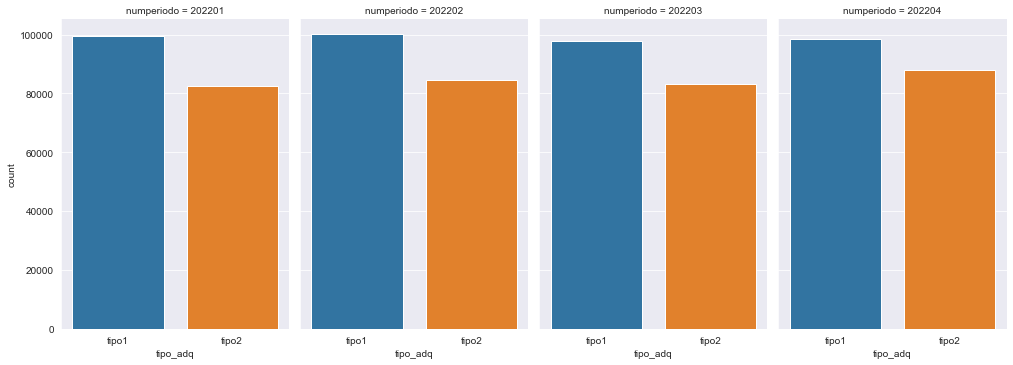

In [40]:
import seaborn as sns
sns.catplot(x="tipo_adq", col="numperiodo", aspect=.7, kind="count", data=df_sus)

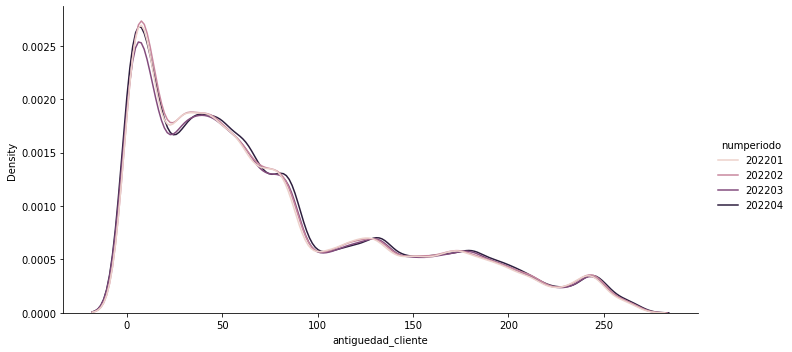

In [148]:
sns.displot(x="antiguedad_contrato",aspect=2.0,hue="numperiodo", kind="kde", data=df_sus)

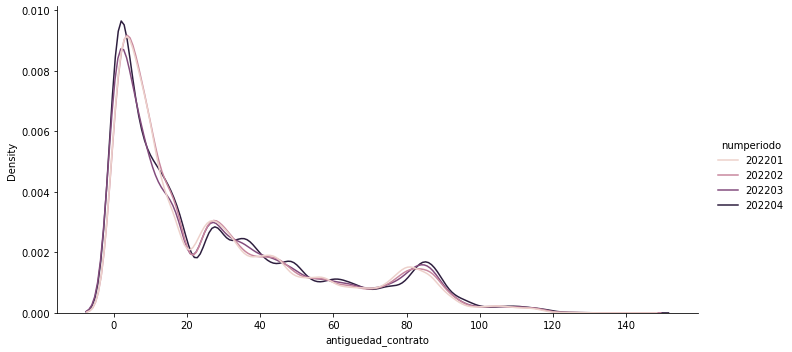

In [147]:
sns.displot(x="antiguedad_contrato",aspect=2.0,hue="numperiodo", kind="kde", data=df_sus)

In [27]:
df_envio_total =df_sus.query('numperiodo == 202204')[['nro_telefono_hash']]
df_envio_total['TARGET'] = 0#np.random.uniform(0,1,len(df_envio_total))

pd.concat([df_envio_total,df_envio],axis=0).to_csv('../03Result/03_envio_202204_zero.csv',index=False)

In [41]:
df_target = pd.read_parquet('../01Data/02parquet/08_target_202201_202203.parquet')
df_target.columns =['numperiodo', 'nro_telefono_hash', 'TARGET']
df_target.groupby(['numperiodo'],as_index=False).size().sort_values('numperiodo',ascending=True)


,numperiodo,size
0,202201,182146
1,202202,184821
2,202203,181029


In [28]:
df_model = pd.merge(df_sus,df_target,on=['nro_telefono_hash','numperiodo'],how='left')
df_model.head()

,numperiodo,fecingresocliente,nro_documento_hash,nro_telefono_hash,fecactivacioncontrato,tipo_adq,TARGET
0,202201,2011-03-02,5f58359a37ac456d9050c75aa36720b73063bf4b77f483...,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,2018-12-07,tipo1,0.0
1,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,2018-12-13,tipo1,0.0
2,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,73cec44593f362cccdb45773197a0bf2136978cb241c91...,2018-12-13,tipo1,0.0
3,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,2018-12-13,tipo2,0.0
4,202201,2005-08-31,ea411834dcd05b9e5eb4e1bed1a6b99250b33a4293fe46...,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,2018-12-13,tipo1,0.0


In [29]:
df_model.TARGET.value_counts()

0.0    531520
1.0     16472
Name: TARGET, dtype: int64

In [6]:
""" Cualquier librería adicional que necesiteis durante el ejercicio, importadlo en esta sección """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [7]:
seed = 210691

In [9]:
col_transformer = ColumnTransformer([ ("tipo_adq_encoder", OneHotEncoder(drop='first'), ['tipo_adq'])])
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
#models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
#models.append(('SVM', SVC()))

X = df_model.query('numperiodo < 202204')[['tipo_adq','antiguedad_cliente','antiguedad_contrato']]
y = df_model.query('numperiodo < 202204')['TARGET']

features, target = X, y

In [10]:
def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

LR: 0.969941 (0.000000)
LDA: 0.969941 (0.000000)
DTC: 0.969941 (0.000000)
RFC: 0.969941 (0.000000)


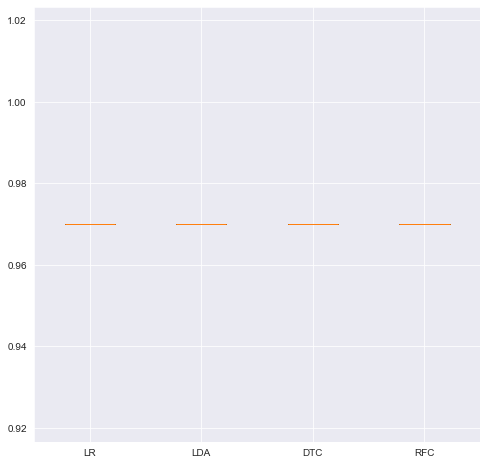

In [11]:
results = []
names = []

for name, model in models:
    
    scaler = RobustScaler()
    pipeline = make_pipeline(col_transformer,scaler, model)
    
    cv_technique = StratifiedKFold(n_splits=8, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, features, target, cv=cv_technique)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

In [14]:
param_grid = { 
    'model__n_estimators': [10, 20],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}
model = RandomForestClassifier()

pipeline = Pipeline([('transformacion_columna', col_transformer), 
                     ('robust_scaler', scaler), 
                     ('model', model)])

cv_technique = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
grid_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv_technique)
grid_model.fit(X, y)

print(grid_model.best_score_)
print(grid_model.best_estimator_)

0.9699411670243361
Pipeline(steps=[('transformacion_columna',
                 ColumnTransformer(transformers=[('tipo_adq_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['tipo_adq'])])),
                ('robust_scaler', RobustScaler()),
                ('model',
                 RandomForestClassifier(max_depth=4, n_estimators=10))])


In [19]:
pred = grid_model.best_estimator_.predict(df_model.query('numperiodo == 202204')[['tipo_adq','antiguedad_cliente','antiguedad_contrato']])
df_final = df_model.query('numperiodo == 202204')
df_final['pred'] = pred

In [21]:
df_final.pred.value_counts()

0.0    186548
Name: pred, dtype: int64